In [0]:
! pip install -q pydot==1.2.3 graphviz
! apt-get install -yq graphviz

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [0]:
from keras.layers import Input, Dense
from keras.models import Model

# Encoder でどれくらい次元を落とす（圧縮する）かを指定
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)


In [0]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2736 - val_loss: 0.1879
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1690 - val_loss: 0.1523
Epoch 3/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1430 - val_loss: 0.1322
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1271 - val_loss: 0.1200
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1171 - val_loss: 0.1118
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1100 - val_loss: 0.1057
Epoch 7/50
19712/60000 [========>.....................] - ETA: 1s - loss: 0.1064

60000/60000 [==============================] - 2s 34us/step - loss: 0.1048 - val_loss: 0.1014
Epoch 8/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1011 - val_loss: 0.0984
Epoch 9/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0986 - val_loss: 0.0963
Epoch 10/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0969 - val_loss: 0.0948
Epoch 11/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0957 - val_loss: 0.0939
Epoch 12/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0950 - val_loss: 0.0933
Epoch 13/50
56832/60000 [===========================>..] - ETA: 0s - loss: 0.0945

60000/60000 [==============================] - 2s 35us/step - loss: 0.0945 - val_loss: 0.0929
Epoch 14/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0941 - val_loss: 0.0927
Epoch 15/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0939 - val_loss: 0.0925
Epoch 16/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0937 - val_loss: 0.0923
Epoch 17/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0935 - val_loss: 0.0921
Epoch 18/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 19/50
56320/60000 [===========================>..] - ETA: 0s - loss: 0.0933

60000/60000 [==============================] - 2s 36us/step - loss: 0.0933 - val_loss: 0.0920
Epoch 20/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0932 - val_loss: 0.0919
Epoch 21/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0931 - val_loss: 0.0920
Epoch 22/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 23/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0930 - val_loss: 0.0917
Epoch 24/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0930 - val_loss: 0.0917
Epoch 25/50
57856/60000 [===========================>..] - ETA: 0s - loss: 0.0930

60000/60000 [==============================] - 2s 35us/step - loss: 0.0929 - val_loss: 0.0917
Epoch 26/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0929 - val_loss: 0.0917
Epoch 27/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0929 - val_loss: 0.0917
Epoch 28/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0929 - val_loss: 0.0916
Epoch 29/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 30/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0928 - val_loss: 0.0915
Epoch 31/50
55296/60000 [==========================>...] - ETA: 0s - loss: 0.0928

60000/60000 [==============================] - 2s 36us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 32/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0928 - val_loss: 0.0915
Epoch 33/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0928 - val_loss: 0.0915
Epoch 34/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0927 - val_loss: 0.0915
Epoch 35/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0927 - val_loss: 0.0915
Epoch 36/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0927 - val_loss: 0.0915
Epoch 37/50
55552/60000 [==========================>...] - ETA: 0s - loss: 0.0927

60000/60000 [==============================] - 2s 35us/step - loss: 0.0927 - val_loss: 0.0916
Epoch 38/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0927 - val_loss: 0.0915
Epoch 39/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0927 - val_loss: 0.0915
Epoch 40/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0926 - val_loss: 0.0914
Epoch 41/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0926 - val_loss: 0.0914
Epoch 42/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 43/50
52224/60000 [=========================>....] - ETA: 0s - loss: 0.0925

60000/60000 [==============================] - 2s 35us/step - loss: 0.0926 - val_loss: 0.0914
Epoch 44/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0926 - val_loss: 0.0914
Epoch 45/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0926 - val_loss: 0.0914
Epoch 46/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 47/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0926 - val_loss: 0.0914
Epoch 48/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 49/50
46080/60000 [======================>.......] - ETA: 0s - loss: 0.0925

60000/60000 [==============================] - 2s 38us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 50/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0926 - val_loss: 0.0914


In [0]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

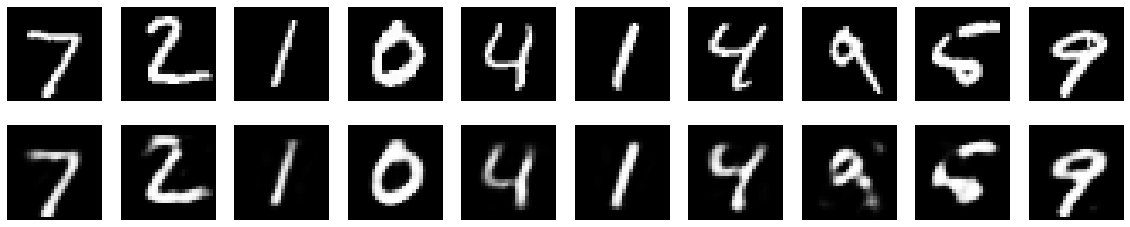

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()